<left>
    <a href=img><img src = "https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/Misc/1c86bfb3-cab0-4255-99bf-24c5488d888a-1632765661247.png?raw=true" width="400"  />
</left>

###### Developed by Tiago Moraes (09.02.2022)

# Data Science Test - Part II

----

The following notebooks presents the complete dataset analysis, exploration and pre-processing steps required to implement a tailored machine learning model designed to **predict the total minutes** ('total_minutes' label) it takes to a shopper to complete a given order.

For that, **3 different notebooks** were prepared for each task, as following:

- **[1. ETL process notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/ETL.ipynb)** Complete ETL (data wrangling) process of the provided datasets, including feature engineering, feature transformations, and data standardizations, necessary to carry out all the statistics tests necessaries in the next phase;

- **[2. EDA notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/ETL.ipynb)** Statistical exploration and understanding of the pre-processed dataset. Needed to define the best machine learning strategy for the target Label;

- **[3. Machine Learning Model development notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/ETL.ipynb)** Build, train and test a ML model that takes in the process the dataset, generates a model and deploy it with unseen data to generate predictions ("total_minutes" label)
<br />
<br />

This notebook catches up from the previous one (1.ETL - Data Science Test.ipynb) and uses the processed file throughout the entire exploratory data analysis

# 2. EDA process - Analytical and statistical data exploration


----

## 1. Importing necessary modules and data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

### 1.1 Loading dataset "df_TRAIN.csv" obtained from the ETL notebook

After loading the df_TRAIN.csv into a dataframe called **df_EDA**, let's look at the first five rows using the `head()` function:

In [2]:
filename_EDA = "https://raw.githubusercontent.com/tiagottmoraes/CS-s-Data-Science-Test/main/data/df_TRAIN.csv"
df_EDA = pd.read_csv(filename_EDA)
df_EDA.head()

,Unnamed: 0,order_id,store_branch_id,shopper_id,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
0,0,e750294655c2c7c34d83cc3181c09de4,65ded5353c5ee48d0b7d48c591b8f430,e63bc83a1a952fa2b3cc9d558fb943cf,1,I,19,0.9024,1.30,0.92,4.76,1.818407,67.684264
1,1,3bb5d9adb3ecac1925b60d5d26a510c4,65ded5353c5ee48d0b7d48c591b8f430,e63bc83a1a952fa2b3cc9d558fb943cf,1,I,34,0.9024,1.30,0.92,4.76,0.961885,160.336211
2,2,b838eea64cf24dde0a78ce1feb84ca7c,65ded5353c5ee48d0b7d48c591b8f430,cb5ef07d15fb3981eeb6e0011bc80163,0,I,72,0.8909,1.17,0.96,5.00,1.653246,122.239210
3,3,2c85303190a77493348b0b827232f4d6,65ded5353c5ee48d0b7d48c591b8f430,ca54a789a8dc54742710490e25df9844,0,I,80,0.8462,1.11,0.96,4.96,0.695847,133.113926
4,4,e606cc26b843c312df82a29d1f8d4372,65ded5353c5ee48d0b7d48c591b8f430,362e274d254be8fae76396b8f10a7fd5,0,M,29,0.8138,1.89,0.84,4.68,3.316783,94.734479


In [3]:
#removing the first column ("Unnamed: 0")
df_EDA.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
#checking overall data statistics
df_EDA.describe(include=['int64', 'float64'])

,on_demand,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
count,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000
mean,0.454591,19.830640,0.863376,1.689766,0.916663,4.850866,2.885621,81.152277
std,0.497965,16.512362,0.029568,0.630342,0.097248,0.126150,1.831026,34.705843
min,0.000000,1.000000,0.737300,0.650000,0.240000,3.880000,0.076566,11.969489
25%,0.000000,7.000000,0.846800,1.260000,0.880000,4.800000,1.587437,55.301119
50%,0.000000,16.000000,0.865200,1.520000,0.960000,4.880000,2.500813,74.752992
75%,1.000000,28.000000,0.883350,2.000000,1.000000,4.960000,3.907589,100.302939
max,1.000000,145.000000,0.971000,7.040000,1.000000,5.000000,16.631580,304.190303


## 2. Statistical tests


The following EDA was carried out using 3 distinct analysis: <br>
- A. Correlation Test
- B. Skewness Test
- C. Variance Test

In [14]:
df_EDA.corr()['total_minutes'].sort_values(ascending=False)

total_minutes    1.000000
order_size       0.585021
distance_km      0.139457
picking_speed    0.080071
accepted_rate   -0.020568
rating          -0.020735
found_rate      -0.108025
on_demand       -0.263293
Name: total_minutes, dtype: float64

<AxesSubplot:>

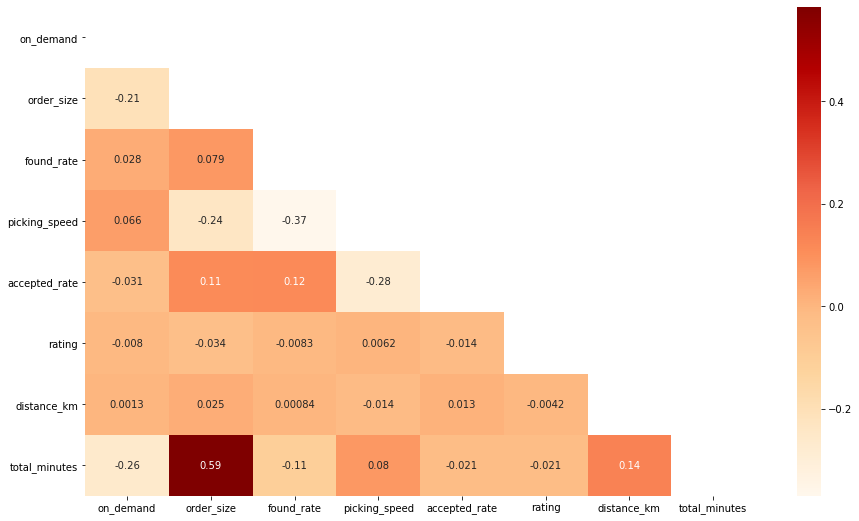

In [15]:
plt.figure(figsize = (15,9))
mask=np.triu(df_EDA.corr())
sns.heatmap(df_EDA.corr(), mask=mask, annot=True, cmap='OrRd')

## 3. Spatial Analysis

Since we have coordinates for both stores and delivery locations, let's take a quick look how they are scattered in the map using the folium library.

In [18]:
#Fetching spatial data from the web
address = 'Santiago, Chile' #just an example to extract the coordinates

geolocator = Nominatim(user_agent="st_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santiago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santiago are -33.4377756, -70.6504502.


In [ ]:
# create map of Santiago using latitude and longitude values
map_santiago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
for lat, lng, in zip(df_EDA['store_lat'], df_EDA['store_long']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
for lat, lng, in zip(df_EDA['delivery_lat'], df_EDA['delivery_long']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago) 
    
map_santiago